In [1]:
setwd("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.2. Original Data")
Output = c("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.3. Heat Map/ Output")
cur_date = "020922"

library(readxl)
library(tidyverse)
library(reshape2)
suppressPackageStartupMessages(library(dendextend))
library(pheatmap)

#reading in file
gene_expression_data = read_csv("022821_NormCounts_pslog2_RUV.csv")
gene_expression_key = read_csv("MouseToxicology.csv")
pathway_mRNAs = data.frame(read_excel("FlamingPeat_4h_pathwaymRNAs_020322.xlsx"))
gene_signficance_df = data.frame(read_excel("gene_expression_significance_020422.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  Exposure = col_character(),
  Replicate = col_character(),
  Timepoint = col_character(),
  MouseID = col_character(),
  Neutrophil = col_double(),
  Macrophage = col_doub

In [2]:
head(gene_expression_data)
head(gene_expression_key)

X1,M1_RedOakSmolder,M2_RedOakSmolder,M3_RedOakSmolder,M4_RedOakSmolder,M5_RedOakSmolder,M6_RedOakSmolder,M7_PeatSmolder,M8_PeatSmolder,M9_PeatSmolder,⋯,MH73_RedOakSmolder,MH74_RedOakSmolder,MH75_RedOakSmolder,MH76_RedOakSmolder,MH77_PeatSmolder,MH78_PeatSmolder,MH79_PeatSmolder,MH80_PeatSmolder,MH81_PeatSmolder,MH82_PeatSmolder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik_56046,6.001951,7.335479,7.061139,6.989344,6.384322,6.120804,5.820447,5.395755,6.660710,⋯,11.441009,10.903624,10.884591,10.933032,11.111472,11.197014,11.108450,10.699222,11.084482,10.868255
0610010F05Rik_69119,10.293167,9.755566,9.720385,10.272557,10.170494,10.212171,9.834238,10.386983,9.907812,⋯,9.303855,9.350846,9.622918,8.924832,8.982636,9.344629,9.039890,9.152558,9.578020,9.299622
0610010F05Rik_74637,4.693722,4.574181,5.542715,4.385701,3.715631,5.601566,5.219821,5.259070,5.376674,⋯,5.388887,5.117777,5.622112,5.674268,5.662769,4.709338,5.484767,5.224846,5.725906,4.860043
0610010K14Rik_31619,9.353322,8.368016,8.311618,8.280457,8.973519,8.977257,8.831136,9.169027,8.672639,⋯,7.627248,7.680924,7.873690,7.918498,7.629239,7.764098,7.952784,7.425485,7.370099,7.194414
0610010K14Rik_31873,9.230662,9.038618,8.758387,8.900100,9.868493,8.992879,9.160850,9.037294,8.829621,⋯,8.785173,8.773179,9.054666,8.336706,8.098710,8.662672,8.197349,8.505360,8.677667,8.136555
0610010K14Rik_68949,7.049897,7.538015,7.604721,7.000066,6.555433,7.193874,7.003423,7.018238,7.559411,⋯,7.121863,7.200933,7.541390,7.630316,7.163479,7.752922,7.555034,7.315125,7.527259,7.503961


Exposure,Replicate,Timepoint,MouseID,Neutrophil,Macrophage,Cytokine_IL6,Cytokine_TNFa,Cytokine_MIP2,Injury_Protein,Injury_Albumin,Injury_NAG,Injury_LDH,Injury_GGT
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saline,REP1,4h,M31,1875,57050.4,12.051550,6.511351,63.17561,77.472,12.314,1.365,26.650,3.179
Saline,REP2,4h,M32,0,58320.4,3.200000,3.200000,47.56897,72.023,15.594,1.131,21.130,4.474
Saline,REP3,4h,M33,525,36380.1,3.200000,3.200000,36.44962,48.205,14.079,1.136,33.530,3.495
Saline,REP4,4h,M34,1750,72437.9,NA,NA,NA,NA,NA,NA,NA,NA
Saline,REP5,4h,M35,1317,69129.1,5.847005,1.743920,63.17561,85.646,19.797,0.852,51.855,3.847
Saline,REP6,4h,M36,0,65761.7,3.200000,3.200000,36.44962,61.900,14.055,0.888,34.616,2.658


In [3]:
head(pathway_mRNAs)
head(gene_signficance_df)

,Gene
,<chr>
1,ABCC1
2,ABCC4
3,ACTA1
4,ACTB
5,ACTG1
6,AKR1A1


,Exposure,Sample.Collection.Timepoint.Post.Exposure..h.,Gene.Identifier,baseMean,log2FoldChange,Increased.vs.Decreased.Expression,p.value,BH.p.value
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,PeatFlame,4,Txnrd1,110.6,2.21,Increased Expression,9.056398e-23,1.571828e-18
2,PeatFlame,4,Osgin1,147.2,2.27,Increased Expression,1.673232e-19,1.452031e-15
3,PeatFlame,4,Mt2,678.3,3.28,Increased Expression,4.832613e-19,2.795828e-15
4,PeatFlame,4,Txnrd1,545.8,1.56,Increased Expression,1.019113e-18,4.421932e-15
5,PeatFlame,4,Hmox1,40.4,3.24,Increased Expression,4.804855e-18,1.667861e-14
6,PeatFlame,4,Tnfrsf12a,848.2,2.09,Increased Expression,1.298203e-17,3.755267e-14


In [4]:
#reshaping for easier filtering
gene_expression_data = melt(gene_expression_data %>% 
                            rename(Gene = X1), variable = "Treatment", value.name = "NormCount")
head(gene_expression_data)

Using Gene as id variables



,Gene,Treatment,NormCount
,<chr>,<fct>,<dbl>
1,0610009B22Rik_56046,M1_RedOakSmolder,6.001951
2,0610010F05Rik_69119,M1_RedOakSmolder,10.293167
3,0610010F05Rik_74637,M1_RedOakSmolder,4.693722
4,0610010K14Rik_31619,M1_RedOakSmolder,9.353322
5,0610010K14Rik_31873,M1_RedOakSmolder,9.230662
6,0610010K14Rik_68949,M1_RedOakSmolder,7.049897


In [5]:
#now will combine the gene expression dataset with the key to filter for samples that were exposed for 4h
gene_expression_key = gene_expression_key %>%
    mutate(Treatment = paste(MouseID,Exposure, sep = "_"))
head(gene_expression_key)

Exposure,Replicate,Timepoint,MouseID,Neutrophil,Macrophage,Cytokine_IL6,Cytokine_TNFa,Cytokine_MIP2,Injury_Protein,Injury_Albumin,Injury_NAG,Injury_LDH,Injury_GGT,Treatment
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Saline,REP1,4h,M31,1875,57050.4,12.051550,6.511351,63.17561,77.472,12.314,1.365,26.650,3.179,M31_Saline
Saline,REP2,4h,M32,0,58320.4,3.200000,3.200000,47.56897,72.023,15.594,1.131,21.130,4.474,M32_Saline
Saline,REP3,4h,M33,525,36380.1,3.200000,3.200000,36.44962,48.205,14.079,1.136,33.530,3.495,M33_Saline
Saline,REP4,4h,M34,1750,72437.9,NA,NA,NA,NA,NA,NA,NA,NA,M34_Saline
Saline,REP5,4h,M35,1317,69129.1,5.847005,1.743920,63.17561,85.646,19.797,0.852,51.855,3.847,M35_Saline
Saline,REP6,4h,M36,0,65761.7,3.200000,3.200000,36.44962,61.900,14.055,0.888,34.616,2.658,M36_Saline


In [6]:
#THIS IS A PROBLEM!!!
# length(unique(gene_expression_key$Treatment))
# length(unique(gene_expression_data$Treatment))

# `%notin%` <- Negate(`%in%`)
# c = gene_expression_data %>%
#     filter(Treatment %notin% unique(gene_expression_key$Treatment))
# unique(c$Treatment)

In [7]:
gene_expression_data = inner_join(gene_expression_data, gene_expression_key %>%
    select(Exposure, Timepoint, Treatment)) 
head(gene_expression_data)

Joining, by = "Treatment"



,Gene,Treatment,NormCount,Exposure,Timepoint
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,0610009B22Rik_56046,M1_RedOakSmolder,6.001951,RedOakSmolder,4h
2,0610010F05Rik_69119,M1_RedOakSmolder,10.293167,RedOakSmolder,4h
3,0610010F05Rik_74637,M1_RedOakSmolder,4.693722,RedOakSmolder,4h
4,0610010K14Rik_31619,M1_RedOakSmolder,9.353322,RedOakSmolder,4h
5,0610010K14Rik_31873,M1_RedOakSmolder,9.230662,RedOakSmolder,4h
6,0610010K14Rik_68949,M1_RedOakSmolder,7.049897,RedOakSmolder,4h


In [8]:
pathway_peatflame_df = gene_expression_data %>%
    #removing exposures that aren't peat flame or saline
    filter(Exposure == "PeatFlame" | Exposure == "Saline") %>%
    #removing heart samples 
    filter(!grepl("MH", Treatment)) %>%
    #only keeping 4h timepoints
    filter(Timepoint == "4h") %>%
    #removing extra numbers after the underscore to make the next step easier
    separate(Gene, c("Gene", NA), sep = "_") %>%
    filter(tolower(Gene) %in% tolower(pathway_mRNAs$Gene)) %>%
    #for some reason there are duplicate entries for genes, so just taking average so the genes are unique
    # also z score normalizing data
    group_by(Exposure, Gene, Treatment) %>%
    summarize(NormCount = mean(NormCount)) %>%
    # also z score normalizing data by Gene
    group_by(Gene) %>%
    mutate(NormCount = scale(NormCount))

head(pathway_peatflame_df)

pathway_redoakflame_df = gene_expression_data %>%
    #removing exposures that aren't red oak flame or saline
    filter(Exposure == "RedOakFlame" | Exposure == "Saline") %>%
    #removing heart samples 
    filter(!grepl("MH", Treatment)) %>%
    #only keeping 4h timepoints
    filter(Timepoint == "4h") %>%
    #removing extra numbers after the underscore to make the next step easier
    separate(Gene, c("Gene", NA), sep = "_") %>%
    filter(tolower(Gene) %in% tolower(pathway_mRNAs$Gene)) %>%
    #for some reason there are duplicate entries for genes, so just taking average so the genes are unique
    # also z score normalizing data
    group_by(Exposure, Gene, Treatment) %>%
    summarize(NormCount = mean(NormCount)) %>%
    # also z score normalizing data by Gene
    group_by(Gene) %>%
    mutate(NormCount = scale(NormCount))

head(pathway_redoakflame_df)

`summarise()` has grouped output by 'Exposure', 'Gene'. You can override using the `.groups` argument.



Exposure,Gene,Treatment,NormCount
<chr>,<chr>,<chr>,"<dbl[,1]>"
PeatFlame,Abcc1,M43_PeatFlame,1.5559009
PeatFlame,Abcc1,M44_PeatFlame,1.2286602
PeatFlame,Abcc1,M45_PeatFlame,0.9817520
PeatFlame,Abcc1,M46_PeatFlame,0.1590183
PeatFlame,Abcc1,M47_PeatFlame,0.4780628
PeatFlame,Abcc1,M48_PeatFlame,-0.3310170


`summarise()` has grouped output by 'Exposure', 'Gene'. You can override using the `.groups` argument.



Exposure,Gene,Treatment,NormCount
<chr>,<chr>,<chr>,"<dbl[,1]>"
RedOakFlame,Abcc1,M37_RedOakFlame,0.1532490
RedOakFlame,Abcc1,M38_RedOakFlame,1.7353415
RedOakFlame,Abcc1,M39_RedOakFlame,0.2847076
RedOakFlame,Abcc1,M40_RedOakFlame,-0.4451769
RedOakFlame,Abcc1,M41_RedOakFlame,-0.2244520
RedOakFlame,Abcc1,M42_RedOakFlame,0.7001726


In [9]:
#lastly filtering for genes that were differentially expressed based on genes that are in the significance dataset
#PEAT FLAME
pf_significance_df = gene_signficance_df %>%
    #filtering dataset for peat flame and 4h time exposure
    filter(Exposure == "PeatFlame" & Sample.Collection.Timepoint.Post.Exposure..h. == 4)

peatflame_final_df = pathway_peatflame_df %>%
    filter(Gene %in% pf_significance_df$Gene.Identifier)
head(peatflame_final_df)

#number of genes in our pathways of interest that will be in the final df
length(unique(peatflame_final_df$Gene))

#RED OAK
rof_significance_df = gene_signficance_df %>%
    #filtering dataset for peat flame and 4h time exposure
    filter(Exposure == "RedOakFlame" & Sample.Collection.Timepoint.Post.Exposure..h. == 4)

redoakflame_final_df = pathway_redoakflame_df %>%
    filter(Gene %in% rof_significance_df$Gene.Identifier)
head(redoakflame_final_df)

#number of genes in our pathways of interest that will be in the final df
length(unique(redoakflame_final_df$Gene))

Exposure,Gene,Treatment,NormCount
<chr>,<chr>,<chr>,"<dbl[,1]>"
PeatFlame,Abcc1,M43_PeatFlame,1.5559009
PeatFlame,Abcc1,M44_PeatFlame,1.2286602
PeatFlame,Abcc1,M45_PeatFlame,0.9817520
PeatFlame,Abcc1,M46_PeatFlame,0.1590183
PeatFlame,Abcc1,M47_PeatFlame,0.4780628
PeatFlame,Abcc1,M48_PeatFlame,-0.3310170


[1] 95

Exposure,Gene,Treatment,NormCount
<chr>,<chr>,<chr>,"<dbl[,1]>"
RedOakFlame,Actb,M37_RedOakFlame,0.5740036
RedOakFlame,Actb,M38_RedOakFlame,0.7326894
RedOakFlame,Actb,M39_RedOakFlame,1.3232933
RedOakFlame,Actb,M40_RedOakFlame,0.3713898
RedOakFlame,Actb,M41_RedOakFlame,1.5106645
RedOakFlame,Actb,M42_RedOakFlame,0.3614477


[1] 30

In [10]:
#now organzing df for heat map

#getting gene ordered by average concentrations
pf_desc_genes_df = peatflame_final_df %>%
    group_by(Gene) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(Avg_NormCount)

head(pf_desc_genes_df)

#getting treatment conditions ordered by average concentrations
pf_desc_treatment_df = peatflame_final_df %>%
    group_by(Exposure, Treatment) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(desc(Exposure), Avg_NormCount)

head(pf_desc_treatment_df)

#getting gene ordered by average concentrations
rof_desc_genes_df = redoakflame_final_df %>%
    group_by(Gene) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(Avg_NormCount)

head(rof_desc_genes_df)

#getting treatment conditions ordered by average concentrations
rof_desc_treatment_df = redoakflame_final_df %>%
    group_by(Exposure, Treatment) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(desc(Exposure), Avg_NormCount)

head(rof_desc_treatment_df)

Gene,Avg_NormCount
<chr>,<dbl>
Actb,-2.693456e-15
Actg1,-2.442491e-15
Ncoa1,-1.946206e-15
Slc2a8,-1.831308e-15
Camk1,-1.598236e-15
Mafk,-1.511573e-15


`summarise()` has grouped output by 'Exposure'. You can override using the `.groups` argument.



Exposure,Treatment,Avg_NormCount
<chr>,<chr>,<dbl>
Saline,M31_Saline,-0.56407275
Saline,M33_Saline,-0.43534814
Saline,M32_Saline,-0.21346424
Saline,M34_Saline,-0.05919908
Saline,M35_Saline,0.02244251
Saline,M36_Saline,0.20103104


Gene,Avg_NormCount
<chr>,<dbl>
Nras,-5.365500e-15
Actb,-1.069737e-15
Hspa5,-9.812741e-16
Actg1,-9.763602e-16
Ep300,-9.182199e-16
Ncoa1,-8.905004e-16


`summarise()` has grouped output by 'Exposure'. You can override using the `.groups` argument.



Exposure,Treatment,Avg_NormCount
<chr>,<chr>,<dbl>
Saline,M31_Saline,-0.74244761
Saline,M33_Saline,-0.56267162
Saline,M32_Saline,-0.16322758
Saline,M34_Saline,0.04374775
Saline,M35_Saline,0.04444179
Saline,M36_Saline,0.15415430


# Heat Map

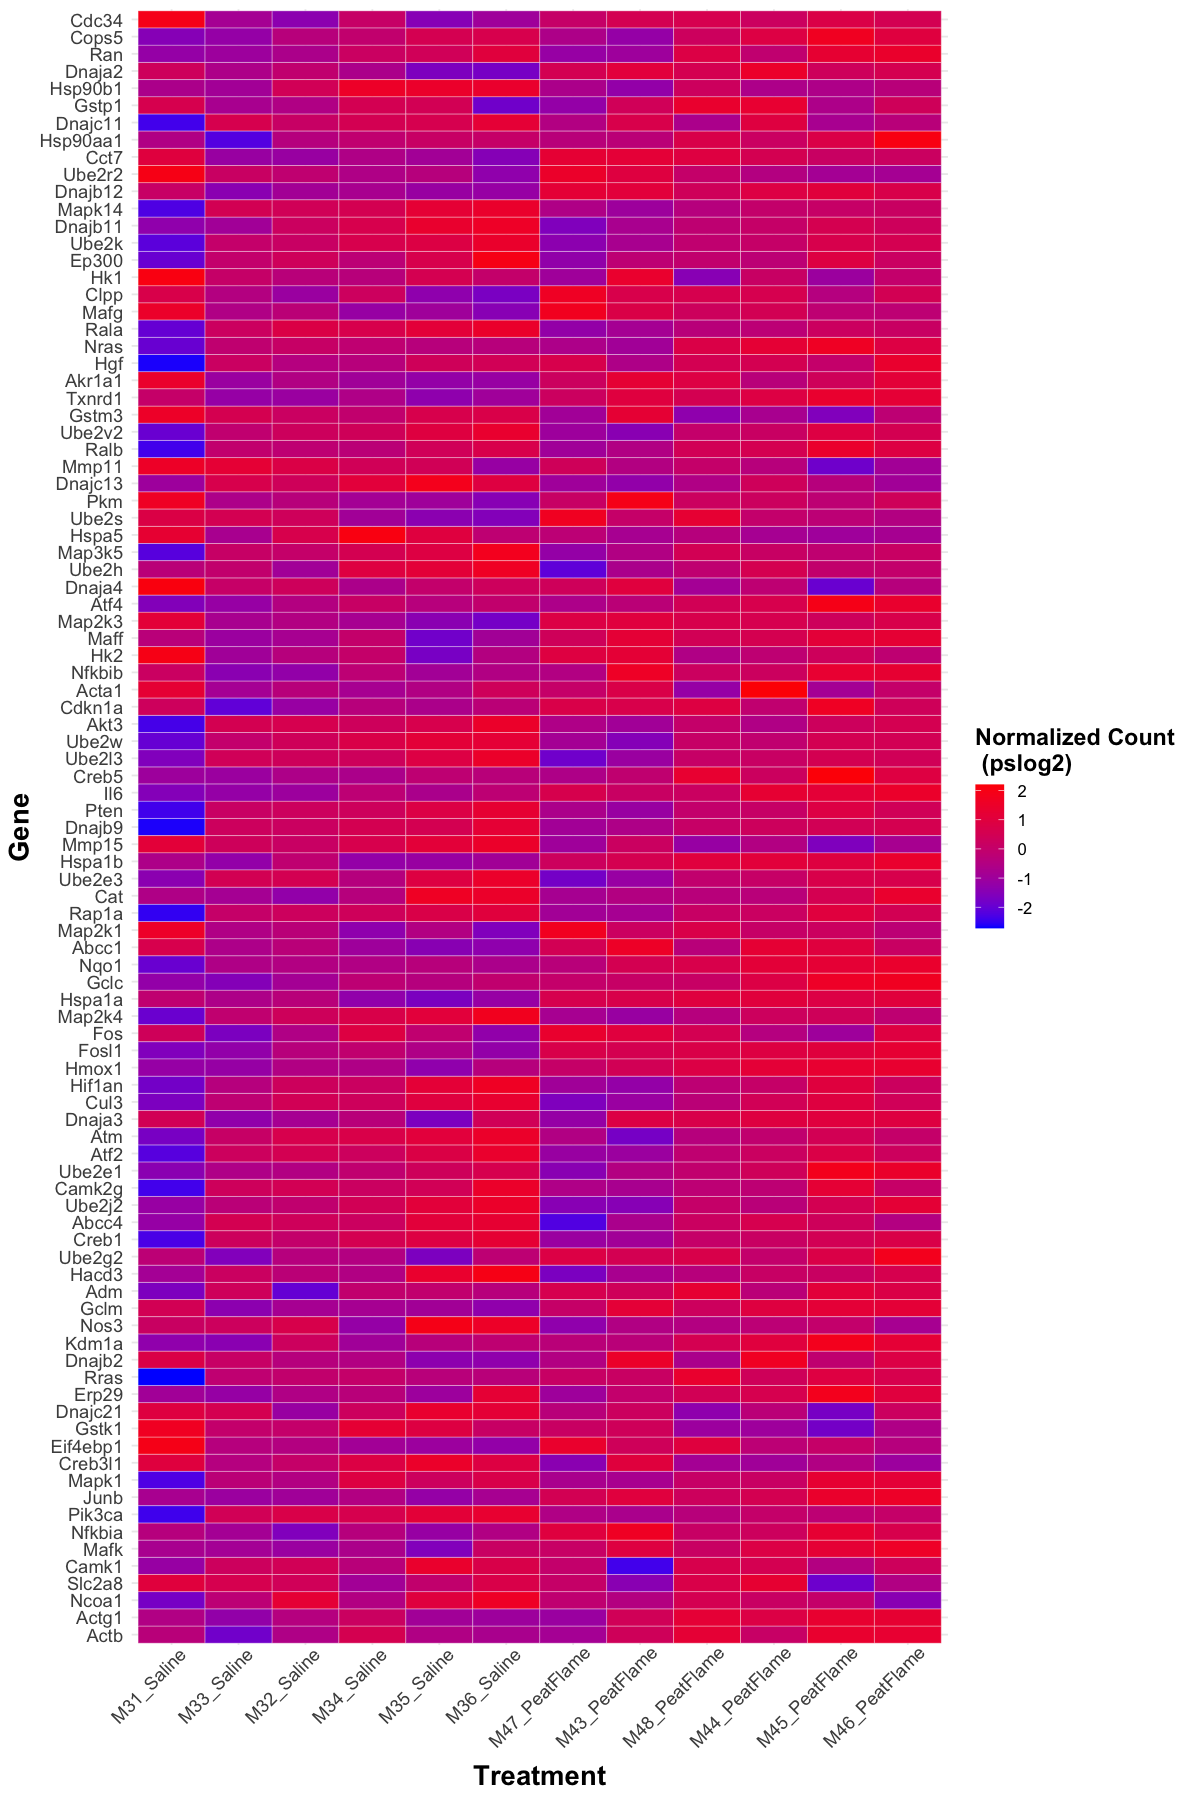

In [11]:
options(repr.plot.width=10, repr.plot.height=15) #changing size
 
#samples ordered by avg norm count
ordered_samples = factor(peatflame_final_df$Treatment, levels = pf_desc_treatment_df$Treatment)

#genes ordered by avg norm count
ordered_genes = factor(peatflame_final_df$Gene, levels = pf_desc_genes_df$Gene)

lung_peatflame_heatmap = ggplot(data = peatflame_final_df, aes(x = ordered_samples, y = ordered_genes, fill = NormCount)) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Treatment", y = "Gene", fill = "Normalized Count \n (pslog2)")

lung_peatflame_heatmap

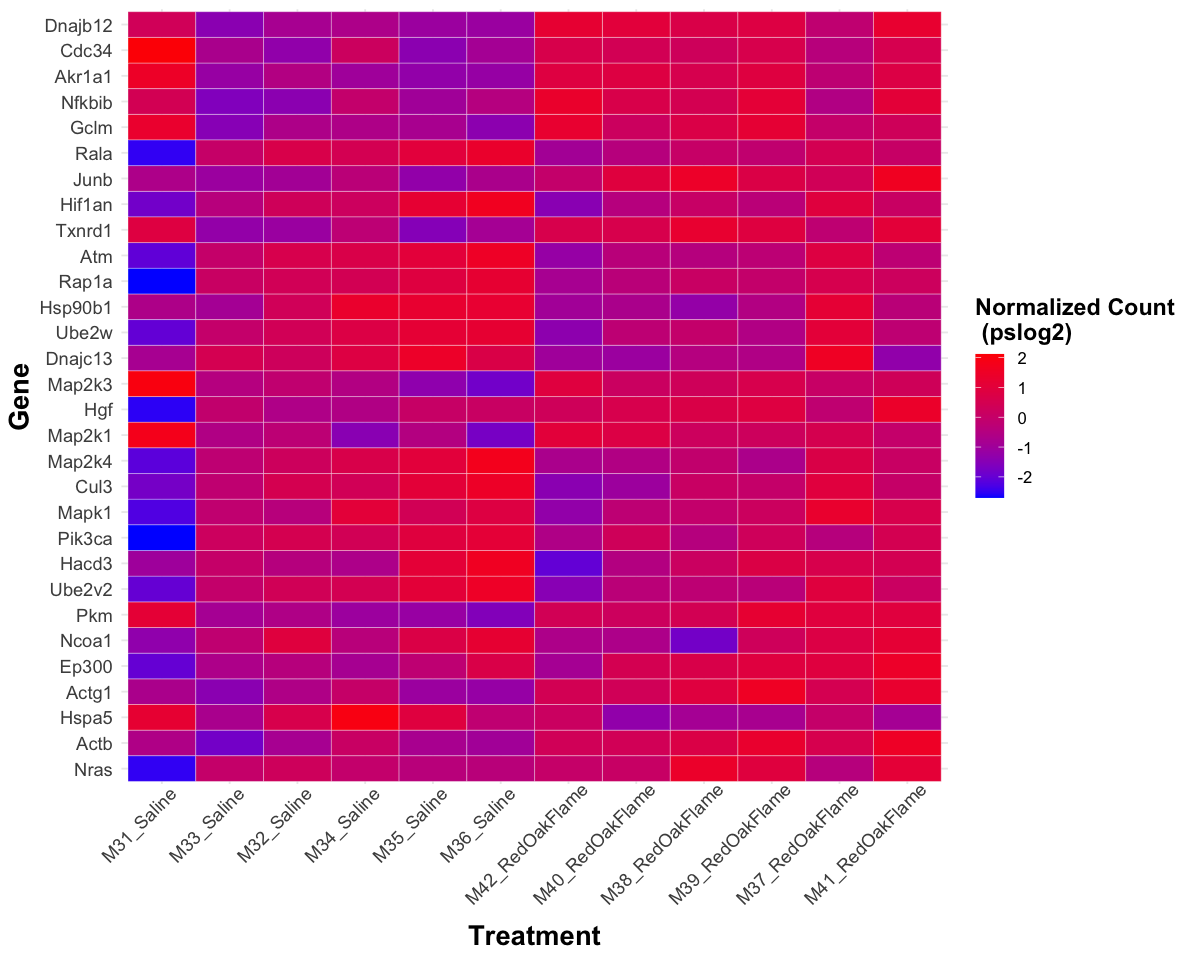

In [12]:
options(repr.plot.width=10, repr.plot.height=8) #changing size
 
#samples ordered by avg norm count
ordered_samples = factor(redoakflame_final_df$Treatment, levels = rof_desc_treatment_df$Treatment)

#genes ordered by avg norm count
ordered_genes = factor(redoakflame_final_df$Gene, levels = rof_desc_genes_df$Gene)

lung_redoakflame_heatmap = ggplot(data = redoakflame_final_df, aes(x = ordered_samples, y = ordered_genes, fill = NormCount)) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Treatment", y = "Gene", fill = "Normalized Count \n (pslog2)")

lung_redoakflame_heatmap

# Hierarchical Clustering

Visualizing how genes cluster.

In [17]:
peatflame_final_df$Exposure = factor(peatflame_final_df$Exposure, levels = c("Saline", "PeatFlame"))
peatflame_heatmap_df = peatflame_final_df %>%
    #filter(Exposure == "Saline") %>%
    select(-Exposure) %>%
    pivot_wider(names_from = Treatment, values_from = NormCount) %>%
    column_to_rownames(var = "Gene") %>%
    as.matrix()

head(peatflame_heatmap_df)

,M43_PeatFlame,M44_PeatFlame,M45_PeatFlame,M46_PeatFlame,M47_PeatFlame,M48_PeatFlame,M31_Saline,M32_Saline,M33_Saline,M34_Saline,M35_Saline,M36_Saline
Abcc1,1.5559009,1.2286602,0.9817520,0.159018303,0.47806282,-0.3310170,0.6416080,-0.3052155,-0.6529816,-0.99177707,-1.44374397,-1.3202672
Abcc4,-0.7207410,0.6021646,0.3316978,-0.482705971,-2.24469852,0.2150398,-1.1771961,0.3384548,0.5280499,0.22826420,1.08470461,1.2969660
Acta1,0.7461030,2.2054795,-0.8683364,0.005223932,0.03104613,-1.1743379,1.2458109,-0.3618654,-0.8590524,-0.79952867,-0.51560303,0.3450602
Actb,0.3712775,0.1034745,1.3589745,1.306719585,-0.86028246,1.2174739,-0.3342119,-0.5950415,-1.8473263,0.57759679,-0.55050196,-0.7481529
Actg1,0.3990307,0.8311513,1.3424149,1.297092082,-1.10669185,1.1999247,-0.5399062,-0.4364968,-1.2529147,0.21489796,-0.92673432,-1.0217677
Adm,0.3639709,-0.2863036,1.0814711,0.796888329,0.60504934,1.2636866,-1.6450477,-2.0087595,0.3484182,-0.06220351,-0.07546328,-0.3817069


In [22]:
redoakflame_final_df$Exposure = factor(redoakflame_final_df$Exposure, levels = c("Saline", "redoakFlame"))
redoakflame_heatmap_df = redoakflame_final_df %>%
    #filter(Exposure == "Saline") %>%
    select(-Exposure) %>%
    pivot_wider(names_from = Treatment, values_from = NormCount) %>%
    column_to_rownames(var = "Gene") %>%
    as.matrix()

head(redoakflame_heatmap_df)

,M37_RedOakFlame,M38_RedOakFlame,M39_RedOakFlame,M40_RedOakFlame,M41_RedOakFlame,M42_RedOakFlame,M31_Saline,M32_Saline,M33_Saline,M34_Saline,M35_Saline,M36_Saline
Actb,0.5740036,0.7326894,1.32329325,0.3713898,1.51066453,0.3614477,-0.6168594,-0.8217547,-1.80548996,0.09941404,-0.7867666,-0.9420317
Actg1,0.4957708,0.8936154,1.56010094,0.3627363,1.28019458,0.4435108,-0.7211881,-0.6198775,-1.41972522,0.01829649,-1.1001650,-1.1932696
Akr1a1,-0.2287743,0.5568680,0.88743149,0.8311259,0.78416003,0.8597215,1.4655815,-0.5440959,-1.15580839,-0.99065197,-1.2801392,-1.1854186
Atm,0.8368186,-0.4605851,-0.26766366,-0.3583139,-0.24431867,-1.1904663,-2.0700324,0.5832995,-0.03414592,0.66495992,1.0303140,1.5101339
Cdc34,-0.4092209,0.2800963,0.59831622,0.4122275,0.54690752,0.6186038,2.1122972,-1.3084986,-0.75041314,0.19503152,-1.4074402,-0.8879071
Cul3,0.9419855,0.1033768,-0.01886308,-1.0617924,0.01579079,-1.4307035,-1.7864322,0.5147959,-0.18410585,0.37032199,1.0616958,1.4739300


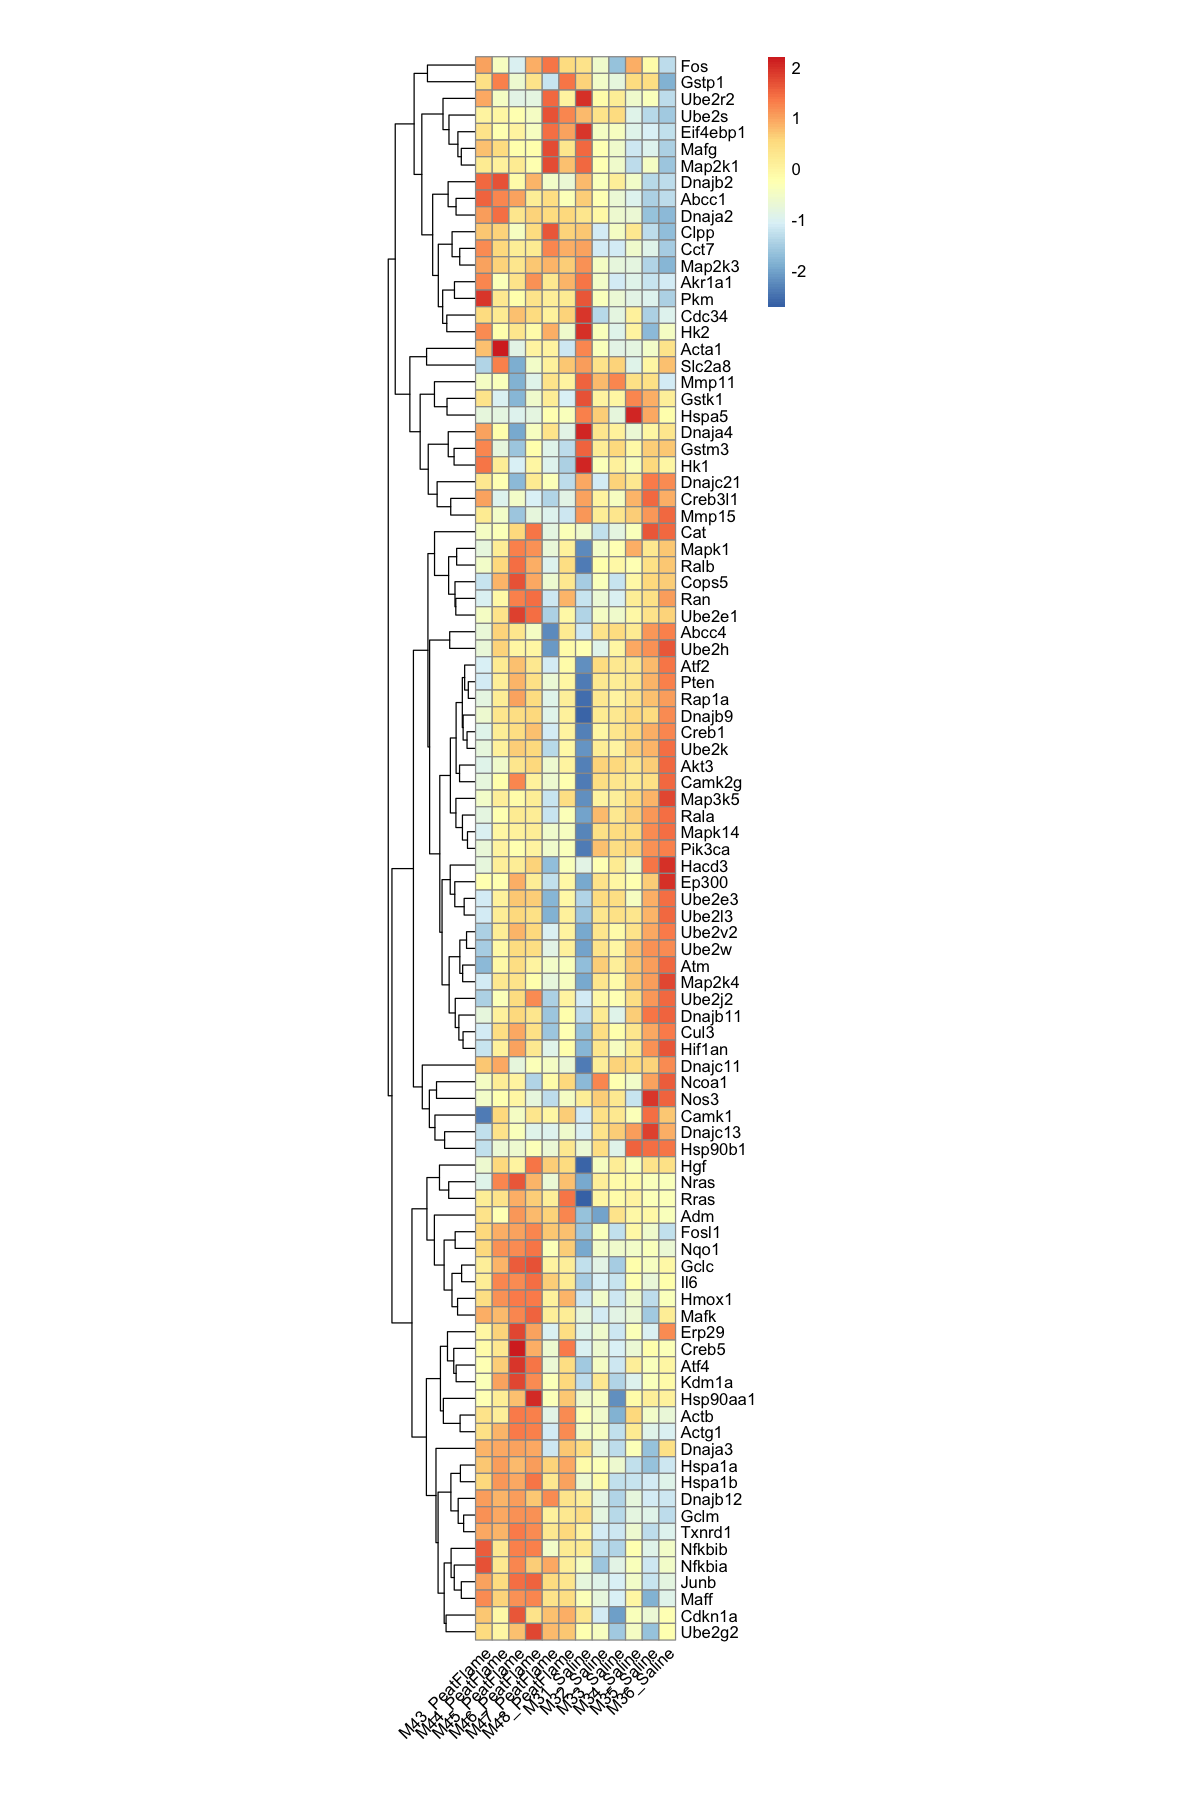

In [25]:
options(repr.plot.width=10, repr.plot.height=15) #changing size
pheatmap(peatflame_heatmap_df, cluster_rows = TRUE, cluster_cols = FALSE, legend = TRUE,
         angle_col = 45, #fontsize_col = 10,  
         cellheight = 10, cellwidth = 10#, 
         #color = colorRampPalette(rev(brewer.pal(n = 7, name ="RdBu"))),
         #breaks = c(0, .5, 1)
        )

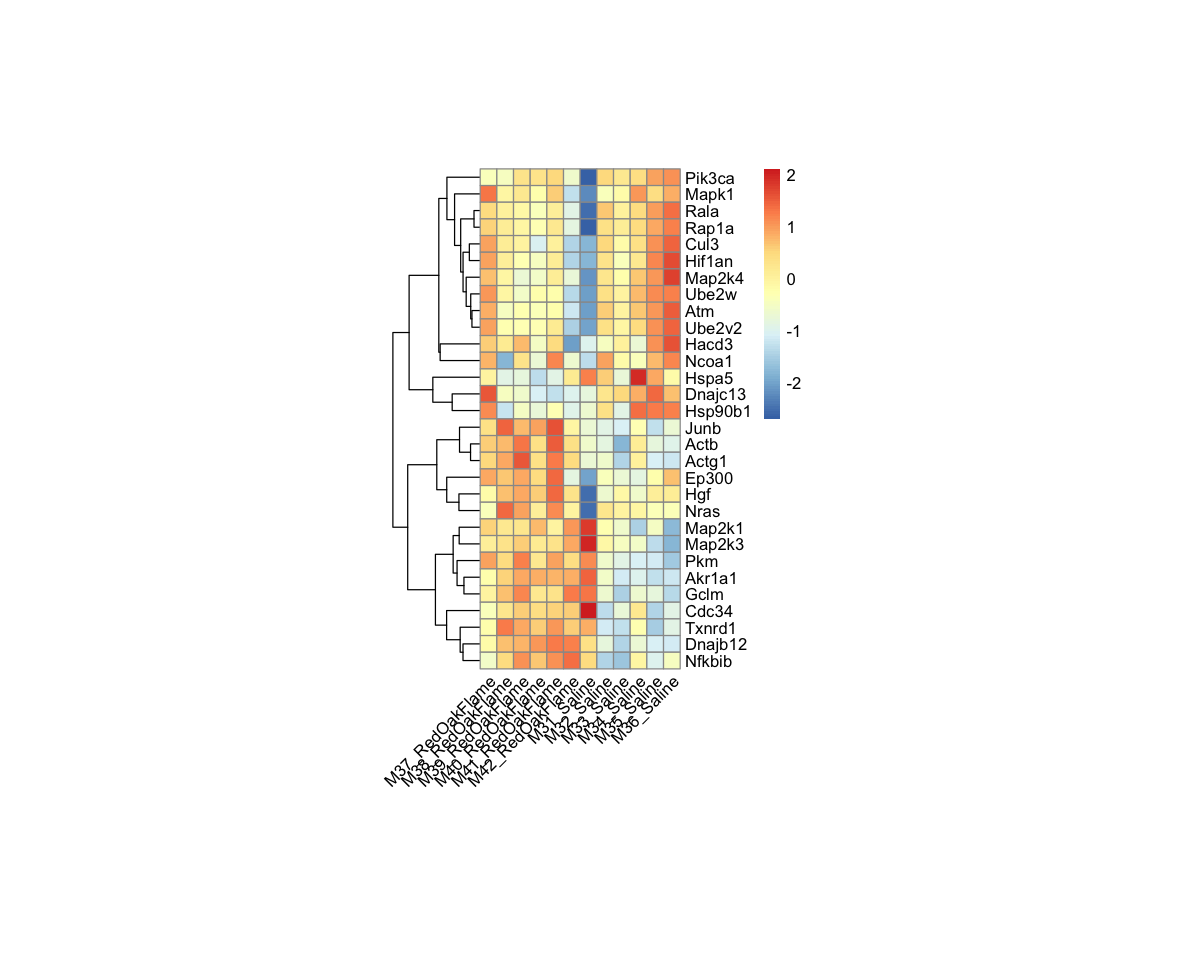

In [28]:
options(repr.plot.width=10, repr.plot.height=8) #changing size
pheatmap(redoakflame_heatmap_df, cluster_rows = TRUE, cluster_cols = FALSE, legend = TRUE,
         angle_col = 45, cutree_cols = 2,#fontsize_col = 7,  
         cellheight = 10, cellwidth = 10)